In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import sqlalchemy
from sqlalchemy import create_engine

database_path = "NC_Resources/nc_voter_data.sqlite" 

In [2]:
engine = create_engine(f'sqlite:///{database_path}', echo=False)

In [3]:
nc_voter_df = pd.read_csv('NC_Resources/history_stats_20220726.txt', delimiter='\t')
nc_voter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44583 entries, 0 to 44582
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   county_desc         44583 non-null  object
 1   precinct_abbrv      44583 non-null  object
 2   vtd_abbrv           44583 non-null  object
 3   age                 44583 non-null  object
 4   party_cd            44583 non-null  object
 5   race_code           44583 non-null  object
 6   ethnic_code         44583 non-null  object
 7   sex_code            44583 non-null  object
 8   total_voters        44583 non-null  int64 
 9   election_date       44583 non-null  object
 10  stats_type          44583 non-null  object
 11  update_date         44583 non-null  object
 12  voting_method       44583 non-null  object
 13  voting_method_desc  44583 non-null  object
 14  voted_party_cd      44583 non-null  object
dtypes: int64(1), object(14)
memory usage: 5.1+ MB


In [4]:
nc_voter_df.dropna()

,county_desc,precinct_abbrv,vtd_abbrv,age,party_cd,race_code,ethnic_code,sex_code,total_voters,election_date,stats_type,update_date,voting_method,voting_method_desc,voted_party_cd
0,MECKLENBURG,056,056,Age Over 66,DEM,B,NL,F,4,07/26/2022,history,08/10/2022,U,ABS-CURB,DEM
1,MECKLENBURG,056,056,Age Over 66,DEM,B,NL,F,14,07/26/2022,history,08/10/2022,V,IN-PERSON,DEM
2,MECKLENBURG,056,056,Age Over 66,DEM,B,NL,M,6,07/26/2022,history,08/10/2022,O,ABS-1STOP,DEM
3,MECKLENBURG,056,056,Age Over 66,DEM,B,NL,M,1,07/26/2022,history,08/10/2022,U,ABS-CURB,DEM
4,MECKLENBURG,056,056,Age Over 66,DEM,B,NL,M,8,07/26/2022,history,08/10/2022,V,IN-PERSON,DEM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44578,MECKLENBURG,056,056,Age 41 - 65,UNA,W,NL,M,1,07/26/2022,history,08/10/2022,O,ABS-1STOP,UNA
44579,MECKLENBURG,056,056,Age Over 66,DEM,A,UN,M,1,07/26/2022,history,08/10/2022,V,IN-PERSON,DEM
44580,MECKLENBURG,056,056,Age Over 66,DEM,B,NL,F,1,07/26/2022,history,08/10/2022,C,CURBSIDE,DEM
44581,MECKLENBURG,056,056,Age Over 66,DEM,B,NL,F,2,07/26/2022,history,08/10/2022,M,ABS-MAIL,DEM


In [5]:
nc_voter_df = nc_voter_df[['county_desc', 'party_cd', 'race_code','ethnic_code','total_voters','election_date']].copy()
nc_voter_df.head()

,county_desc,party_cd,race_code,ethnic_code,total_voters,election_date
0,MECKLENBURG,DEM,B,NL,4,07/26/2022
1,MECKLENBURG,DEM,B,NL,14,07/26/2022
2,MECKLENBURG,DEM,B,NL,6,07/26/2022
3,MECKLENBURG,DEM,B,NL,1,07/26/2022
4,MECKLENBURG,DEM,B,NL,8,07/26/2022


In [6]:
nc_voter_df['State'] ='NC'

In [7]:
nc_voter_df.columns

Index(['county_desc', 'party_cd', 'race_code', 'ethnic_code', 'total_voters',
       'election_date', 'State'],
      dtype='object')

In [8]:
new_cols = ['State','county_desc', 'party_cd', 'race_code', 'ethnic_code', 'total_voters',
       'election_date']
nc_voter_df = nc_voter_df[new_cols]

In [9]:
#Changing values to ensure consistent naming practice across all datasets:

nc_voter_df.replace({'ethnic_code': 'UN'}, {'ethnic_code': 'UNK'}, inplace=True)

In [10]:
nc_voter_df['ethnic_code'].unique()

array(['NL', 'UNK', 'HL'], dtype=object)

In [11]:
#Changing the names of the columns to ensure consistent naming practice across all datasets:

nc_voter_df.rename(columns = {'county_desc':'County_Name', 'party_cd':'Party',
                            'race_code':'Race_Code', 'ethnic_code': 'Ethnic_Code',
                            'total_voters':'Total_Voters',
                            'election_date':'Election_Date'}, inplace=True)

In [12]:
nc_voter_df.dtypes

State            object
County_Name      object
Party            object
Race_Code        object
Ethnic_Code      object
Total_Voters      int64
Election_Date    object
dtype: object

In [13]:
# Change 'date' column into a 'datetime' datatype
nc_voter_df['Election_Date'] = pd.to_datetime(nc_voter_df['Election_Date'], errors='coerce')
nc_voter_df['Election_Date'] = nc_voter_df['Election_Date'].dt.date

In [14]:
nc_voter_df['Ethnic_Code'].unique()

array(['NL', 'UNK', 'HL'], dtype=object)

In [15]:
nc_voter_df.dtypes

State            object
County_Name      object
Party            object
Race_Code        object
Ethnic_Code      object
Total_Voters      int64
Election_Date    object
dtype: object

In [16]:
nc_voter_df['Party'] = nc_voter_df['Party'].replace(['UNA','LIB'], 'UNA')
nc_voter_df['Party'].unique()

array(['DEM', 'REP', 'UNA'], dtype=object)

In [17]:
nc_voter_df['County_Name'].unique()

array(['MECKLENBURG', 'NASH', 'WAKE', 'CATAWBA', 'CHATHAM', 'CRAVEN',
       'CUMBERLAND', 'FRANKLIN', 'GRAHAM', 'IREDELL', 'LEE'], dtype=object)

In [18]:
voter_turnout = nc_voter_df.groupby('County_Name')['Total_Voters'].sum().sort_values(ascending=False)
voter_turnout

County_Name
MECKLENBURG    72865
WAKE           38112
CUMBERLAND     14908
CRAVEN          6138
FRANKLIN        4705
IREDELL         3181
CATAWBA         2052
LEE             1759
NASH             955
GRAHAM           871
CHATHAM          474
Name: Total_Voters, dtype: int64

In [19]:
nc_voter_df['Total_Voters'].sum()

146020

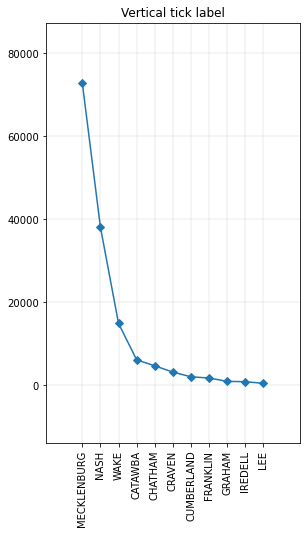

In [20]:
x = [1,2,3,4,5,6,7,8,9,10,11]
y = voter_turnout
labels = ['MECKLENBURG', 'NASH', 'WAKE', 'CATAWBA', 'CHATHAM', 'CRAVEN',
       'CUMBERLAND', 'FRANKLIN', 'GRAHAM', 'IREDELL', 'LEE']
plt.subplots_adjust(bottom=0.15)

plt.subplot(122)
plt.plot(x, y, marker='D')
plt.xticks(x, labels, rotation='vertical')
plt.margins(0.2)
plt.title("Vertical tick label")
plt.gcf().set_size_inches(10,8)
plt.grid(linewidth = 0.25)

plt.show()

In [21]:
#storing the dataframe in a csv for review as/if needed
nc_voter_df.to_csv('NC_Resources/cleaned_nc_voterdata.csv')

In [22]:
#storing the dataframe in a sql table to load it into our database:

nc_voter_df.to_sql('NC_Resources/nc_voterdata', con=engine, if_exists='replace')

In [ ]:
data = engine.execute("SELECT * FROM nc_voterdata")
for record in data:
    print(record)

(0, 'NC', 'MECKLENBURG', 'DEM', 'B', 'NL', 4, '2022-07-26')
(1, 'NC', 'MECKLENBURG', 'DEM', 'B', 'NL', 14, '2022-07-26')
(2, 'NC', 'MECKLENBURG', 'DEM', 'B', 'NL', 6, '2022-07-26')
(3, 'NC', 'MECKLENBURG', 'DEM', 'B', 'NL', 1, '2022-07-26')
(4, 'NC', 'MECKLENBURG', 'DEM', 'B', 'NL', 8, '2022-07-26')
(5, 'NC', 'MECKLENBURG', 'DEM', 'B', 'NL', 1, '2022-07-26')
(6, 'NC', 'MECKLENBURG', 'DEM', 'B', 'UNK', 3, '2022-07-26')
(7, 'NC', 'MECKLENBURG', 'DEM', 'B', 'UNK', 3, '2022-07-26')
(8, 'NC', 'MECKLENBURG', 'DEM', 'B', 'UNK', 1, '2022-07-26')
(9, 'NC', 'MECKLENBURG', 'DEM', 'B', 'UNK', 1, '2022-07-26')
(10, 'NC', 'MECKLENBURG', 'DEM', 'U', 'UNK', 1, '2022-07-26')
(11, 'NC', 'MECKLENBURG', 'REP', 'B', 'NL', 1, '2022-07-26')
(12, 'NC', 'MECKLENBURG', 'UNA', 'B', 'NL', 1, '2022-07-26')
(13, 'NC', 'MECKLENBURG', 'DEM', 'A', 'NL', 1, '2022-07-26')
(14, 'NC', 'MECKLENBURG', 'DEM', 'W', 'NL', 1, '2022-07-26')
(15, 'NC', 'MECKLENBURG', 'DEM', 'W', 'NL', 1, '2022-07-26')
(16, 'NC', 'MECKLENBURG', 'D

(1280, 'NC', 'MECKLENBURG', 'DEM', 'U', 'UNK', 2, '2022-07-26')
(1281, 'NC', 'MECKLENBURG', 'DEM', 'U', 'UNK', 1, '2022-07-26')
(1282, 'NC', 'MECKLENBURG', 'DEM', 'W', 'NL', 3, '2022-07-26')
(1283, 'NC', 'MECKLENBURG', 'DEM', 'W', 'NL', 15, '2022-07-26')
(1284, 'NC', 'MECKLENBURG', 'DEM', 'W', 'NL', 1, '2022-07-26')
(1285, 'NC', 'MECKLENBURG', 'DEM', 'W', 'NL', 3, '2022-07-26')
(1286, 'NC', 'MECKLENBURG', 'DEM', 'W', 'NL', 5, '2022-07-26')
(1287, 'NC', 'MECKLENBURG', 'DEM', 'W', 'NL', 1, '2022-07-26')
(1288, 'NC', 'MECKLENBURG', 'DEM', 'W', 'UNK', 2, '2022-07-26')
(1289, 'NC', 'MECKLENBURG', 'DEM', 'W', 'UNK', 2, '2022-07-26')
(1290, 'NC', 'MECKLENBURG', 'DEM', 'W', 'UNK', 2, '2022-07-26')
(1291, 'NC', 'MECKLENBURG', 'UNA', 'M', 'HL', 1, '2022-07-26')
(1292, 'NC', 'MECKLENBURG', 'REP', 'B', 'NL', 1, '2022-07-26')
(1293, 'NC', 'MECKLENBURG', 'REP', 'U', 'UNK', 1, '2022-07-26')
(1294, 'NC', 'MECKLENBURG', 'REP', 'W', 'NL', 2, '2022-07-26')
(1295, 'NC', 'MECKLENBURG', 'REP', 'W', 'NL', 14

(2458, 'NC', 'MECKLENBURG', 'DEM', 'B', 'NL', 1, '2022-07-26')
(2459, 'NC', 'MECKLENBURG', 'DEM', 'B', 'UNK', 2, '2022-07-26')
(2460, 'NC', 'MECKLENBURG', 'DEM', 'B', 'UNK', 2, '2022-07-26')
(2461, 'NC', 'MECKLENBURG', 'DEM', 'B', 'UNK', 1, '2022-07-26')
(2462, 'NC', 'MECKLENBURG', 'DEM', 'M', 'NL', 1, '2022-07-26')
(2463, 'NC', 'MECKLENBURG', 'DEM', 'O', 'HL', 1, '2022-07-26')
(2464, 'NC', 'MECKLENBURG', 'DEM', 'O', 'NL', 1, '2022-07-26')
(2465, 'NC', 'MECKLENBURG', 'DEM', 'O', 'NL', 2, '2022-07-26')
(2466, 'NC', 'MECKLENBURG', 'DEM', 'U', 'UNK', 1, '2022-07-26')
(2467, 'NC', 'MECKLENBURG', 'DEM', 'W', 'NL', 1, '2022-07-26')
(2468, 'NC', 'MECKLENBURG', 'DEM', 'W', 'NL', 1, '2022-07-26')
(2469, 'NC', 'MECKLENBURG', 'DEM', 'W', 'NL', 4, '2022-07-26')
(2470, 'NC', 'MECKLENBURG', 'DEM', 'W', 'NL', 2, '2022-07-26')
(2471, 'NC', 'MECKLENBURG', 'REP', 'A', 'NL', 1, '2022-07-26')
(2472, 'NC', 'MECKLENBURG', 'REP', 'B', 'NL', 2, '2022-07-26')
(2473, 'NC', 'MECKLENBURG', 'REP', 'B', 'NL', 1, '2

(3434, 'NC', 'MECKLENBURG', 'UNA', 'W', 'HL', 1, '2022-07-26')
(3435, 'NC', 'MECKLENBURG', 'UNA', 'W', 'NL', 8, '2022-07-26')
(3436, 'NC', 'MECKLENBURG', 'UNA', 'W', 'NL', 8, '2022-07-26')
(3437, 'NC', 'MECKLENBURG', 'UNA', 'W', 'NL', 10, '2022-07-26')
(3438, 'NC', 'MECKLENBURG', 'UNA', 'W', 'NL', 10, '2022-07-26')
(3439, 'NC', 'MECKLENBURG', 'UNA', 'W', 'UNK', 1, '2022-07-26')
(3440, 'NC', 'MECKLENBURG', 'UNA', 'W', 'UNK', 1, '2022-07-26')
(3441, 'NC', 'MECKLENBURG', 'UNA', 'W', 'UNK', 3, '2022-07-26')
(3442, 'NC', 'MECKLENBURG', 'DEM', 'B', 'NL', 11, '2022-07-26')
(3443, 'NC', 'MECKLENBURG', 'DEM', 'B', 'NL', 3, '2022-07-26')
(3444, 'NC', 'MECKLENBURG', 'DEM', 'B', 'NL', 4, '2022-07-26')
(3445, 'NC', 'MECKLENBURG', 'DEM', 'B', 'UNK', 1, '2022-07-26')
(3446, 'NC', 'MECKLENBURG', 'DEM', 'B', 'UNK', 1, '2022-07-26')
(3447, 'NC', 'MECKLENBURG', 'DEM', 'O', 'HL', 1, '2022-07-26')
(3448, 'NC', 'MECKLENBURG', 'DEM', 'O', 'NL', 1, '2022-07-26')
(3449, 'NC', 'MECKLENBURG', 'DEM', 'O', 'UNK', 

(4593, 'NC', 'MECKLENBURG', 'UNA', 'O', 'UNK', 1, '2022-07-26')
(4594, 'NC', 'MECKLENBURG', 'DEM', 'B', 'NL', 1, '2022-07-26')
(4595, 'NC', 'MECKLENBURG', 'DEM', 'B', 'NL', 5, '2022-07-26')
(4596, 'NC', 'MECKLENBURG', 'DEM', 'B', 'NL', 1, '2022-07-26')
(4597, 'NC', 'MECKLENBURG', 'DEM', 'B', 'UNK', 2, '2022-07-26')
(4598, 'NC', 'MECKLENBURG', 'DEM', 'B', 'UNK', 1, '2022-07-26')
(4599, 'NC', 'MECKLENBURG', 'DEM', 'U', 'NL', 1, '2022-07-26')
(4600, 'NC', 'MECKLENBURG', 'DEM', 'W', 'NL', 1, '2022-07-26')
(4601, 'NC', 'MECKLENBURG', 'DEM', 'W', 'NL', 1, '2022-07-26')
(4602, 'NC', 'MECKLENBURG', 'DEM', 'W', 'NL', 2, '2022-07-26')
(4603, 'NC', 'MECKLENBURG', 'DEM', 'W', 'NL', 1, '2022-07-26')
(4604, 'NC', 'MECKLENBURG', 'DEM', 'W', 'UNK', 1, '2022-07-26')
(4605, 'NC', 'MECKLENBURG', 'DEM', 'W', 'UNK', 2, '2022-07-26')
(4606, 'NC', 'MECKLENBURG', 'REP', 'W', 'NL', 1, '2022-07-26')
(4607, 'NC', 'MECKLENBURG', 'UNA', 'B', 'NL', 2, '2022-07-26')
(4608, 'NC', 'MECKLENBURG', 'UNA', 'U', 'NL', 1, '

(5802, 'NC', 'MECKLENBURG', 'DEM', 'B', 'UNK', 1, '2022-07-26')
(5803, 'NC', 'MECKLENBURG', 'DEM', 'B', 'UNK', 5, '2022-07-26')
(5804, 'NC', 'MECKLENBURG', 'DEM', 'B', 'UNK', 1, '2022-07-26')
(5805, 'NC', 'MECKLENBURG', 'DEM', 'O', 'HL', 1, '2022-07-26')
(5806, 'NC', 'MECKLENBURG', 'DEM', 'U', 'UNK', 1, '2022-07-26')
(5807, 'NC', 'MECKLENBURG', 'DEM', 'W', 'NL', 1, '2022-07-26')
(5808, 'NC', 'MECKLENBURG', 'DEM', 'W', 'NL', 3, '2022-07-26')
(5809, 'NC', 'MECKLENBURG', 'REP', 'B', 'NL', 1, '2022-07-26')
(5810, 'NC', 'MECKLENBURG', 'REP', 'B', 'NL', 1, '2022-07-26')
(5811, 'NC', 'MECKLENBURG', 'REP', 'O', 'NL', 1, '2022-07-26')
(5812, 'NC', 'MECKLENBURG', 'REP', 'W', 'NL', 1, '2022-07-26')
(5813, 'NC', 'MECKLENBURG', 'REP', 'W', 'NL', 1, '2022-07-26')
(5814, 'NC', 'MECKLENBURG', 'REP', 'W', 'NL', 2, '2022-07-26')
(5815, 'NC', 'MECKLENBURG', 'UNA', 'B', 'NL', 2, '2022-07-26')
(5816, 'NC', 'MECKLENBURG', 'UNA', 'B', 'NL', 3, '2022-07-26')
(5817, 'NC', 'MECKLENBURG', 'UNA', 'B', 'NL', 2, '2

(6986, 'NC', 'MECKLENBURG', 'DEM', 'B', 'NL', 2, '2022-07-26')
(6987, 'NC', 'MECKLENBURG', 'DEM', 'B', 'NL', 2, '2022-07-26')
(6988, 'NC', 'MECKLENBURG', 'DEM', 'B', 'NL', 1, '2022-07-26')
(6989, 'NC', 'MECKLENBURG', 'DEM', 'O', 'NL', 1, '2022-07-26')
(6990, 'NC', 'MECKLENBURG', 'DEM', 'U', 'UNK', 1, '2022-07-26')
(6991, 'NC', 'MECKLENBURG', 'DEM', 'W', 'HL', 1, '2022-07-26')
(6992, 'NC', 'MECKLENBURG', 'DEM', 'W', 'NL', 4, '2022-07-26')
(6993, 'NC', 'MECKLENBURG', 'DEM', 'W', 'NL', 11, '2022-07-26')
(6994, 'NC', 'MECKLENBURG', 'DEM', 'W', 'NL', 1, '2022-07-26')
(6995, 'NC', 'MECKLENBURG', 'DEM', 'W', 'NL', 9, '2022-07-26')
(6996, 'NC', 'MECKLENBURG', 'DEM', 'W', 'NL', 2, '2022-07-26')
(6997, 'NC', 'MECKLENBURG', 'DEM', 'W', 'NL', 6, '2022-07-26')
(6998, 'NC', 'MECKLENBURG', 'DEM', 'W', 'NL', 6, '2022-07-26')
(6999, 'NC', 'MECKLENBURG', 'DEM', 'W', 'UNK', 2, '2022-07-26')
(7000, 'NC', 'MECKLENBURG', 'DEM', 'W', 'UNK', 1, '2022-07-26')
(7001, 'NC', 'MECKLENBURG', 'REP', 'O', 'HL', 1, '2

(8195, 'NC', 'MECKLENBURG', 'DEM', 'B', 'NL', 12, '2022-07-26')
(8196, 'NC', 'MECKLENBURG', 'DEM', 'B', 'UNK', 2, '2022-07-26')
(8197, 'NC', 'MECKLENBURG', 'DEM', 'B', 'UNK', 4, '2022-07-26')
(8198, 'NC', 'MECKLENBURG', 'DEM', 'B', 'UNK', 1, '2022-07-26')
(8199, 'NC', 'MECKLENBURG', 'DEM', 'B', 'UNK', 1, '2022-07-26')
(8200, 'NC', 'MECKLENBURG', 'DEM', 'O', 'HL', 1, '2022-07-26')
(8201, 'NC', 'MECKLENBURG', 'DEM', 'U', 'UNK', 1, '2022-07-26')
(8202, 'NC', 'MECKLENBURG', 'DEM', 'W', 'NL', 1, '2022-07-26')
(8203, 'NC', 'MECKLENBURG', 'DEM', 'W', 'NL', 6, '2022-07-26')
(8204, 'NC', 'MECKLENBURG', 'DEM', 'W', 'NL', 4, '2022-07-26')
(8205, 'NC', 'MECKLENBURG', 'DEM', 'W', 'UNK', 1, '2022-07-26')
(8206, 'NC', 'MECKLENBURG', 'REP', 'B', 'NL', 1, '2022-07-26')
(8207, 'NC', 'MECKLENBURG', 'REP', 'M', 'HL', 1, '2022-07-26')
(8208, 'NC', 'MECKLENBURG', 'REP', 'O', 'UNK', 1, '2022-07-26')
(8209, 'NC', 'MECKLENBURG', 'REP', 'W', 'NL', 1, '2022-07-26')
(8210, 'NC', 'MECKLENBURG', 'REP', 'W', 'NL', 7

(9405, 'NC', 'MECKLENBURG', 'REP', 'W', 'NL', 26, '2022-07-26')
(9406, 'NC', 'MECKLENBURG', 'REP', 'W', 'UNK', 4, '2022-07-26')
(9407, 'NC', 'MECKLENBURG', 'REP', 'W', 'UNK', 2, '2022-07-26')
(9408, 'NC', 'MECKLENBURG', 'UNA', 'B', 'NL', 1, '2022-07-26')
(9409, 'NC', 'MECKLENBURG', 'UNA', 'B', 'NL', 5, '2022-07-26')
(9410, 'NC', 'MECKLENBURG', 'UNA', 'B', 'NL', 5, '2022-07-26')
(9411, 'NC', 'MECKLENBURG', 'UNA', 'B', 'NL', 1, '2022-07-26')
(9412, 'NC', 'MECKLENBURG', 'UNA', 'B', 'NL', 3, '2022-07-26')
(9413, 'NC', 'MECKLENBURG', 'UNA', 'B', 'NL', 5, '2022-07-26')
(9414, 'NC', 'MECKLENBURG', 'UNA', 'B', 'UNK', 2, '2022-07-26')
(9415, 'NC', 'MECKLENBURG', 'UNA', 'B', 'UNK', 1, '2022-07-26')
(9416, 'NC', 'MECKLENBURG', 'UNA', 'M', 'NL', 1, '2022-07-26')
(9417, 'NC', 'MECKLENBURG', 'UNA', 'U', 'NL', 1, '2022-07-26')
(9418, 'NC', 'MECKLENBURG', 'UNA', 'U', 'UNK', 2, '2022-07-26')
(9419, 'NC', 'MECKLENBURG', 'UNA', 'W', 'HL', 1, '2022-07-26')
(9420, 'NC', 'MECKLENBURG', 'UNA', 'W', 'NL', 1, 

(10535, 'NC', 'MECKLENBURG', 'DEM', 'W', 'NL', 5, '2022-07-26')
(10536, 'NC', 'MECKLENBURG', 'DEM', 'W', 'NL', 6, '2022-07-26')
(10537, 'NC', 'MECKLENBURG', 'DEM', 'W', 'NL', 1, '2022-07-26')
(10538, 'NC', 'MECKLENBURG', 'DEM', 'W', 'NL', 2, '2022-07-26')
(10539, 'NC', 'MECKLENBURG', 'DEM', 'W', 'NL', 6, '2022-07-26')
(10540, 'NC', 'MECKLENBURG', 'DEM', 'W', 'UNK', 1, '2022-07-26')
(10541, 'NC', 'MECKLENBURG', 'UNA', 'W', 'NL', 1, '2022-07-26')
(10542, 'NC', 'MECKLENBURG', 'REP', 'B', 'NL', 1, '2022-07-26')
(10543, 'NC', 'MECKLENBURG', 'REP', 'B', 'NL', 1, '2022-07-26')
(10544, 'NC', 'MECKLENBURG', 'REP', 'B', 'NL', 1, '2022-07-26')
(10545, 'NC', 'MECKLENBURG', 'REP', 'B', 'UNK', 1, '2022-07-26')
(10546, 'NC', 'MECKLENBURG', 'REP', 'B', 'UNK', 1, '2022-07-26')
(10547, 'NC', 'MECKLENBURG', 'REP', 'U', 'HL', 1, '2022-07-26')
(10548, 'NC', 'MECKLENBURG', 'REP', 'U', 'HL', 1, '2022-07-26')
(10549, 'NC', 'MECKLENBURG', 'REP', 'U', 'HL', 1, '2022-07-26')
(10550, 'NC', 'MECKLENBURG', 'REP', '

(11633, 'NC', 'MECKLENBURG', 'DEM', 'O', 'NL', 1, '2022-07-26')
(11634, 'NC', 'MECKLENBURG', 'DEM', 'U', 'NL', 1, '2022-07-26')
(11635, 'NC', 'MECKLENBURG', 'DEM', 'U', 'UNK', 1, '2022-07-26')
(11636, 'NC', 'MECKLENBURG', 'DEM', 'W', 'NL', 1, '2022-07-26')
(11637, 'NC', 'MECKLENBURG', 'DEM', 'W', 'NL', 4, '2022-07-26')
(11638, 'NC', 'MECKLENBURG', 'DEM', 'W', 'NL', 9, '2022-07-26')
(11639, 'NC', 'MECKLENBURG', 'DEM', 'W', 'NL', 3, '2022-07-26')
(11640, 'NC', 'MECKLENBURG', 'DEM', 'W', 'NL', 5, '2022-07-26')
(11641, 'NC', 'MECKLENBURG', 'REP', 'B', 'UNK', 1, '2022-07-26')
(11642, 'NC', 'MECKLENBURG', 'REP', 'U', 'UNK', 1, '2022-07-26')
(11643, 'NC', 'MECKLENBURG', 'REP', 'U', 'UNK', 1, '2022-07-26')
(11644, 'NC', 'MECKLENBURG', 'REP', 'W', 'NL', 1, '2022-07-26')
(11645, 'NC', 'MECKLENBURG', 'REP', 'W', 'NL', 5, '2022-07-26')
(11646, 'NC', 'MECKLENBURG', 'REP', 'W', 'NL', 1, '2022-07-26')
(11647, 'NC', 'MECKLENBURG', 'REP', 'W', 'NL', 12, '2022-07-26')
(11648, 'NC', 'MECKLENBURG', 'REP',

(12782, 'NC', 'MECKLENBURG', 'UNA', 'W', 'NL', 1, '2022-07-26')
(12783, 'NC', 'MECKLENBURG', 'UNA', 'W', 'NL', 19, '2022-07-26')
(12784, 'NC', 'MECKLENBURG', 'UNA', 'W', 'UNK', 1, '2022-07-26')
(12785, 'NC', 'MECKLENBURG', 'UNA', 'W', 'UNK', 2, '2022-07-26')
(12786, 'NC', 'MECKLENBURG', 'UNA', 'W', 'UNK', 2, '2022-07-26')
(12787, 'NC', 'MECKLENBURG', 'DEM', 'A', 'NL', 1, '2022-07-26')
(12788, 'NC', 'MECKLENBURG', 'DEM', 'B', 'NL', 1, '2022-07-26')
(12789, 'NC', 'MECKLENBURG', 'DEM', 'B', 'NL', 1, '2022-07-26')
(12790, 'NC', 'MECKLENBURG', 'DEM', 'B', 'NL', 21, '2022-07-26')
(12791, 'NC', 'MECKLENBURG', 'DEM', 'B', 'NL', 1, '2022-07-26')
(12792, 'NC', 'MECKLENBURG', 'DEM', 'B', 'NL', 12, '2022-07-26')
(12793, 'NC', 'MECKLENBURG', 'DEM', 'B', 'NL', 1, '2022-07-26')
(12794, 'NC', 'MECKLENBURG', 'DEM', 'B', 'NL', 17, '2022-07-26')
(12795, 'NC', 'MECKLENBURG', 'DEM', 'B', 'NL', 1, '2022-07-26')
(12796, 'NC', 'MECKLENBURG', 'DEM', 'B', 'NL', 8, '2022-07-26')
(12797, 'NC', 'MECKLENBURG', 'DEM

(13919, 'NC', 'WAKE', 'DEM', 'W', 'NL', 10, '2022-07-26')
(13920, 'NC', 'WAKE', 'DEM', 'W', 'UNK', 1, '2022-07-26')
(13921, 'NC', 'WAKE', 'DEM', 'W', 'UNK', 4, '2022-07-26')
(13922, 'NC', 'WAKE', 'UNA', 'W', 'NL', 1, '2022-07-26')
(13923, 'NC', 'WAKE', 'UNA', 'W', 'NL', 3, '2022-07-26')
(13924, 'NC', 'WAKE', 'UNA', 'W', 'NL', 3, '2022-07-26')
(13925, 'NC', 'WAKE', 'UNA', 'W', 'UNK', 1, '2022-07-26')
(13926, 'NC', 'WAKE', 'DEM', 'B', 'NL', 1, '2022-07-26')
(13927, 'NC', 'WAKE', 'DEM', 'B', 'UNK', 1, '2022-07-26')
(13928, 'NC', 'WAKE', 'DEM', 'W', 'NL', 6, '2022-07-26')
(13929, 'NC', 'WAKE', 'DEM', 'W', 'NL', 26, '2022-07-26')
(13930, 'NC', 'WAKE', 'DEM', 'W', 'NL', 1, '2022-07-26')
(13931, 'NC', 'WAKE', 'DEM', 'W', 'NL', 2, '2022-07-26')
(13932, 'NC', 'WAKE', 'DEM', 'W', 'NL', 24, '2022-07-26')
(13933, 'NC', 'WAKE', 'DEM', 'W', 'UNK', 2, '2022-07-26')
(13934, 'NC', 'WAKE', 'UNA', 'U', 'UNK', 1, '2022-07-26')
(13935, 'NC', 'WAKE', 'UNA', 'W', 'NL', 6, '2022-07-26')
(13936, 'NC', 'WAKE', 

(15102, 'NC', 'WAKE', 'DEM', 'B', 'NL', 11, '2022-07-26')
(15103, 'NC', 'WAKE', 'DEM', 'B', 'UNK', 2, '2022-07-26')
(15104, 'NC', 'WAKE', 'DEM', 'B', 'UNK', 4, '2022-07-26')
(15105, 'NC', 'WAKE', 'DEM', 'B', 'UNK', 1, '2022-07-26')
(15106, 'NC', 'WAKE', 'DEM', 'B', 'UNK', 5, '2022-07-26')
(15107, 'NC', 'WAKE', 'DEM', 'M', 'NL', 1, '2022-07-26')
(15108, 'NC', 'WAKE', 'DEM', 'O', 'HL', 1, '2022-07-26')
(15109, 'NC', 'WAKE', 'DEM', 'O', 'NL', 1, '2022-07-26')
(15110, 'NC', 'WAKE', 'DEM', 'U', 'UNK', 1, '2022-07-26')
(15111, 'NC', 'WAKE', 'DEM', 'W', 'NL', 3, '2022-07-26')
(15112, 'NC', 'WAKE', 'DEM', 'W', 'NL', 11, '2022-07-26')
(15113, 'NC', 'WAKE', 'DEM', 'W', 'NL', 10, '2022-07-26')
(15114, 'NC', 'WAKE', 'DEM', 'W', 'UNK', 2, '2022-07-26')
(15115, 'NC', 'WAKE', 'DEM', 'W', 'UNK', 1, '2022-07-26')
(15116, 'NC', 'WAKE', 'DEM', 'W', 'UNK', 1, '2022-07-26')
(15117, 'NC', 'WAKE', 'UNA', 'B', 'NL', 2, '2022-07-26')
(15118, 'NC', 'WAKE', 'UNA', 'O', 'UNK', 1, '2022-07-26')
(15119, 'NC', 'WAKE

(16222, 'NC', 'WAKE', 'DEM', 'W', 'NL', 2, '2022-07-26')
(16223, 'NC', 'WAKE', 'DEM', 'W', 'NL', 18, '2022-07-26')
(16224, 'NC', 'WAKE', 'DEM', 'W', 'NL', 1, '2022-07-26')
(16225, 'NC', 'WAKE', 'DEM', 'W', 'NL', 8, '2022-07-26')
(16226, 'NC', 'WAKE', 'DEM', 'W', 'UNK', 1, '2022-07-26')
(16227, 'NC', 'WAKE', 'UNA', 'A', 'NL', 1, '2022-07-26')
(16228, 'NC', 'WAKE', 'UNA', 'B', 'NL', 1, '2022-07-26')
(16229, 'NC', 'WAKE', 'UNA', 'B', 'NL', 1, '2022-07-26')
(16230, 'NC', 'WAKE', 'UNA', 'M', 'UNK', 1, '2022-07-26')
(16231, 'NC', 'WAKE', 'UNA', 'W', 'HL', 1, '2022-07-26')
(16232, 'NC', 'WAKE', 'UNA', 'W', 'NL', 1, '2022-07-26')
(16233, 'NC', 'WAKE', 'UNA', 'W', 'NL', 8, '2022-07-26')
(16234, 'NC', 'WAKE', 'UNA', 'W', 'NL', 1, '2022-07-26')
(16235, 'NC', 'WAKE', 'UNA', 'W', 'NL', 7, '2022-07-26')
(16236, 'NC', 'WAKE', 'UNA', 'W', 'UNK', 1, '2022-07-26')
(16237, 'NC', 'WAKE', 'UNA', 'W', 'UNK', 1, '2022-07-26')
(16238, 'NC', 'WAKE', 'UNA', 'W', 'UNK', 1, '2022-07-26')
(16239, 'NC', 'WAKE', 'UN

(17427, 'NC', 'WAKE', 'UNA', 'W', 'NL', 7, '2022-07-26')
(17428, 'NC', 'WAKE', 'UNA', 'W', 'NL', 5, '2022-07-26')
(17429, 'NC', 'WAKE', 'UNA', 'W', 'NL', 9, '2022-07-26')
(17430, 'NC', 'WAKE', 'UNA', 'W', 'NL', 8, '2022-07-26')
(17431, 'NC', 'WAKE', 'UNA', 'W', 'NL', 2, '2022-07-26')
(17432, 'NC', 'WAKE', 'UNA', 'W', 'NL', 6, '2022-07-26')
(17433, 'NC', 'WAKE', 'UNA', 'W', 'NL', 7, '2022-07-26')
(17434, 'NC', 'WAKE', 'UNA', 'W', 'NL', 1, '2022-07-26')
(17435, 'NC', 'WAKE', 'UNA', 'W', 'NL', 17, '2022-07-26')
(17436, 'NC', 'WAKE', 'UNA', 'W', 'NL', 8, '2022-07-26')
(17437, 'NC', 'WAKE', 'UNA', 'W', 'NL', 1, '2022-07-26')
(17438, 'NC', 'WAKE', 'UNA', 'W', 'UNK', 2, '2022-07-26')
(17439, 'NC', 'WAKE', 'UNA', 'W', 'UNK', 2, '2022-07-26')
(17440, 'NC', 'WAKE', 'UNA', 'W', 'UNK', 1, '2022-07-26')
(17441, 'NC', 'WAKE', 'UNA', 'W', 'UNK', 1, '2022-07-26')
(17442, 'NC', 'WAKE', 'DEM', 'B', 'NL', 1, '2022-07-26')
(17443, 'NC', 'WAKE', 'DEM', 'M', 'UNK', 1, '2022-07-26')
(17444, 'NC', 'WAKE', 'DE

(18546, 'NC', 'WAKE', 'REP', 'W', 'UNK', 1, '2022-07-26')
(18547, 'NC', 'WAKE', 'REP', 'W', 'UNK', 3, '2022-07-26')
(18548, 'NC', 'WAKE', 'REP', 'W', 'UNK', 1, '2022-07-26')
(18549, 'NC', 'WAKE', 'UNA', 'B', 'NL', 1, '2022-07-26')
(18550, 'NC', 'WAKE', 'UNA', 'B', 'NL', 1, '2022-07-26')
(18551, 'NC', 'WAKE', 'UNA', 'I', 'NL', 1, '2022-07-26')
(18552, 'NC', 'WAKE', 'UNA', 'O', 'HL', 1, '2022-07-26')
(18553, 'NC', 'WAKE', 'UNA', 'O', 'NL', 1, '2022-07-26')
(18554, 'NC', 'WAKE', 'UNA', 'O', 'NL', 1, '2022-07-26')
(18555, 'NC', 'WAKE', 'UNA', 'W', 'NL', 1, '2022-07-26')
(18556, 'NC', 'WAKE', 'UNA', 'W', 'NL', 3, '2022-07-26')
(18557, 'NC', 'WAKE', 'UNA', 'W', 'NL', 1, '2022-07-26')
(18558, 'NC', 'WAKE', 'UNA', 'W', 'NL', 1, '2022-07-26')
(18559, 'NC', 'WAKE', 'UNA', 'W', 'NL', 5, '2022-07-26')
(18560, 'NC', 'WAKE', 'UNA', 'W', 'NL', 5, '2022-07-26')
(18561, 'NC', 'WAKE', 'UNA', 'W', 'NL', 1, '2022-07-26')
(18562, 'NC', 'WAKE', 'UNA', 'W', 'NL', 1, '2022-07-26')
(18563, 'NC', 'WAKE', 'UNA',

(19718, 'NC', 'WAKE', 'UNA', 'B', 'NL', 1, '2022-07-26')
(19719, 'NC', 'WAKE', 'UNA', 'B', 'NL', 1, '2022-07-26')
(19720, 'NC', 'WAKE', 'UNA', 'B', 'UNK', 1, '2022-07-26')
(19721, 'NC', 'WAKE', 'UNA', 'M', 'HL', 1, '2022-07-26')
(19722, 'NC', 'WAKE', 'UNA', 'O', 'HL', 1, '2022-07-26')
(19723, 'NC', 'WAKE', 'UNA', 'O', 'NL', 1, '2022-07-26')
(19724, 'NC', 'WAKE', 'UNA', 'O', 'NL', 4, '2022-07-26')
(19725, 'NC', 'WAKE', 'UNA', 'O', 'NL', 1, '2022-07-26')
(19726, 'NC', 'WAKE', 'UNA', 'U', 'UNK', 1, '2022-07-26')
(19727, 'NC', 'WAKE', 'UNA', 'U', 'UNK', 1, '2022-07-26')
(19728, 'NC', 'WAKE', 'UNA', 'W', 'HL', 1, '2022-07-26')
(19729, 'NC', 'WAKE', 'UNA', 'W', 'NL', 1, '2022-07-26')
(19730, 'NC', 'WAKE', 'UNA', 'W', 'NL', 4, '2022-07-26')
(19731, 'NC', 'WAKE', 'UNA', 'W', 'NL', 2, '2022-07-26')
(19732, 'NC', 'WAKE', 'UNA', 'W', 'NL', 9, '2022-07-26')
(19733, 'NC', 'WAKE', 'UNA', 'W', 'NL', 11, '2022-07-26')
(19734, 'NC', 'WAKE', 'UNA', 'W', 'NL', 1, '2022-07-26')
(19735, 'NC', 'WAKE', 'UNA'

(20903, 'NC', 'WAKE', 'UNA', 'W', 'NL', 1, '2022-07-26')
(20904, 'NC', 'WAKE', 'UNA', 'W', 'NL', 7, '2022-07-26')
(20905, 'NC', 'WAKE', 'DEM', 'B', 'NL', 1, '2022-07-26')
(20906, 'NC', 'WAKE', 'DEM', 'B', 'NL', 3, '2022-07-26')
(20907, 'NC', 'WAKE', 'DEM', 'B', 'NL', 1, '2022-07-26')
(20908, 'NC', 'WAKE', 'DEM', 'B', 'NL', 2, '2022-07-26')
(20909, 'NC', 'WAKE', 'DEM', 'B', 'UNK', 2, '2022-07-26')
(20910, 'NC', 'WAKE', 'DEM', 'B', 'UNK', 1, '2022-07-26')
(20911, 'NC', 'WAKE', 'DEM', 'W', 'NL', 5, '2022-07-26')
(20912, 'NC', 'WAKE', 'DEM', 'W', 'NL', 4, '2022-07-26')
(20913, 'NC', 'WAKE', 'DEM', 'W', 'NL', 20, '2022-07-26')
(20914, 'NC', 'WAKE', 'DEM', 'W', 'NL', 1, '2022-07-26')
(20915, 'NC', 'WAKE', 'DEM', 'W', 'NL', 3, '2022-07-26')
(20916, 'NC', 'WAKE', 'DEM', 'W', 'NL', 10, '2022-07-26')
(20917, 'NC', 'WAKE', 'DEM', 'W', 'UNK', 1, '2022-07-26')
(20918, 'NC', 'WAKE', 'DEM', 'W', 'UNK', 1, '2022-07-26')
(20919, 'NC', 'WAKE', 'UNA', 'B', 'NL', 2, '2022-07-26')
(20920, 'NC', 'WAKE', 'UN

(22028, 'NC', 'WAKE', 'UNA', 'W', 'NL', 11, '2022-07-26')
(22029, 'NC', 'WAKE', 'UNA', 'W', 'UNK', 3, '2022-07-26')
(22030, 'NC', 'WAKE', 'UNA', 'W', 'UNK', 2, '2022-07-26')
(22031, 'NC', 'WAKE', 'DEM', 'B', 'NL', 1, '2022-07-26')
(22032, 'NC', 'WAKE', 'DEM', 'B', 'UNK', 1, '2022-07-26')
(22033, 'NC', 'WAKE', 'DEM', 'B', 'UNK', 1, '2022-07-26')
(22034, 'NC', 'WAKE', 'DEM', 'W', 'NL', 2, '2022-07-26')
(22035, 'NC', 'WAKE', 'DEM', 'W', 'UNK', 1, '2022-07-26')
(22036, 'NC', 'WAKE', 'UNA', 'M', 'UNK', 1, '2022-07-26')
(22037, 'NC', 'WAKE', 'UNA', 'U', 'HL', 1, '2022-07-26')
(22038, 'NC', 'WAKE', 'UNA', 'W', 'NL', 2, '2022-07-26')
(22039, 'NC', 'WAKE', 'UNA', 'W', 'NL', 1, '2022-07-26')
(22040, 'NC', 'WAKE', 'UNA', 'W', 'UNK', 1, '2022-07-26')
(22041, 'NC', 'WAKE', 'DEM', 'B', 'NL', 1, '2022-07-26')
(22042, 'NC', 'WAKE', 'DEM', 'B', 'NL', 1, '2022-07-26')
(22043, 'NC', 'WAKE', 'DEM', 'W', 'NL', 3, '2022-07-26')
(22044, 'NC', 'WAKE', 'UNA', 'M', 'UNK', 1, '2022-07-26')
(22045, 'NC', 'WAKE', 

(23240, 'NC', 'WAKE', 'DEM', 'W', 'UNK', 1, '2022-07-26')
(23241, 'NC', 'WAKE', 'DEM', 'W', 'UNK', 2, '2022-07-26')
(23242, 'NC', 'WAKE', 'UNA', 'B', 'NL', 1, '2022-07-26')
(23243, 'NC', 'WAKE', 'UNA', 'W', 'HL', 1, '2022-07-26')
(23244, 'NC', 'WAKE', 'UNA', 'W', 'HL', 1, '2022-07-26')
(23245, 'NC', 'WAKE', 'UNA', 'W', 'NL', 1, '2022-07-26')
(23246, 'NC', 'WAKE', 'UNA', 'W', 'NL', 2, '2022-07-26')
(23247, 'NC', 'WAKE', 'UNA', 'W', 'NL', 2, '2022-07-26')
(23248, 'NC', 'WAKE', 'UNA', 'W', 'NL', 2, '2022-07-26')
(23249, 'NC', 'WAKE', 'UNA', 'W', 'UNK', 2, '2022-07-26')
(23250, 'NC', 'WAKE', 'DEM', 'B', 'NL', 1, '2022-07-26')
(23251, 'NC', 'WAKE', 'DEM', 'B', 'NL', 5, '2022-07-26')
(23252, 'NC', 'WAKE', 'DEM', 'B', 'NL', 22, '2022-07-26')
(23253, 'NC', 'WAKE', 'DEM', 'B', 'NL', 1, '2022-07-26')
(23254, 'NC', 'WAKE', 'DEM', 'B', 'NL', 16, '2022-07-26')
(23255, 'NC', 'WAKE', 'DEM', 'B', 'UNK', 2, '2022-07-26')
(23256, 'NC', 'WAKE', 'DEM', 'B', 'UNK', 8, '2022-07-26')
(23257, 'NC', 'WAKE', 'D

(24430, 'NC', 'WAKE', 'DEM', 'B', 'NL', 12, '2022-07-26')
(24431, 'NC', 'WAKE', 'DEM', 'B', 'UNK', 2, '2022-07-26')
(24432, 'NC', 'WAKE', 'DEM', 'B', 'UNK', 3, '2022-07-26')
(24433, 'NC', 'WAKE', 'DEM', 'B', 'UNK', 1, '2022-07-26')
(24434, 'NC', 'WAKE', 'DEM', 'B', 'UNK', 1, '2022-07-26')
(24435, 'NC', 'WAKE', 'DEM', 'U', 'UNK', 1, '2022-07-26')
(24436, 'NC', 'WAKE', 'DEM', 'U', 'UNK', 1, '2022-07-26')
(24437, 'NC', 'WAKE', 'DEM', 'U', 'UNK', 1, '2022-07-26')
(24438, 'NC', 'WAKE', 'DEM', 'W', 'NL', 2, '2022-07-26')
(24439, 'NC', 'WAKE', 'DEM', 'W', 'NL', 3, '2022-07-26')
(24440, 'NC', 'WAKE', 'DEM', 'W', 'NL', 1, '2022-07-26')
(24441, 'NC', 'WAKE', 'DEM', 'W', 'NL', 1, '2022-07-26')
(24442, 'NC', 'WAKE', 'DEM', 'W', 'NL', 3, '2022-07-26')
(24443, 'NC', 'WAKE', 'DEM', 'W', 'UNK', 1, '2022-07-26')
(24444, 'NC', 'WAKE', 'DEM', 'W', 'UNK', 1, '2022-07-26')
(24445, 'NC', 'WAKE', 'UNA', 'B', 'NL', 1, '2022-07-26')
(24446, 'NC', 'WAKE', 'UNA', 'B', 'UNK', 1, '2022-07-26')
(24447, 'NC', 'WAKE'